In [280]:
import pandas as pd


In [281]:
df = pd.read_csv("customer_churn_data.csv")

In [282]:
df.head(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [284]:
df.isna().sum().sum()

297

In [285]:
df["InternetService"] = df["InternetService"].fillna("")

In [286]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [287]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [288]:
df.duplicated().sum()

0

In [289]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [290]:
numeric_columns_data = df.select_dtypes(include = ["number"])


In [291]:
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [292]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


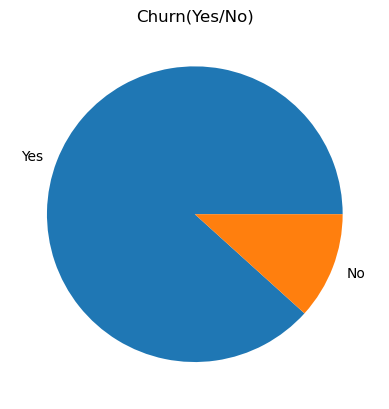

In [293]:
import matplotlib.pyplot as plt
df['Churn'].value_counts().plot(kind = "pie")
plt.title("Churn(Yes/No)")
plt.ylabel("")
plt.show()

In [294]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [295]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [296]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [297]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [298]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At the lower terms we can see that the monthly charge average decreses


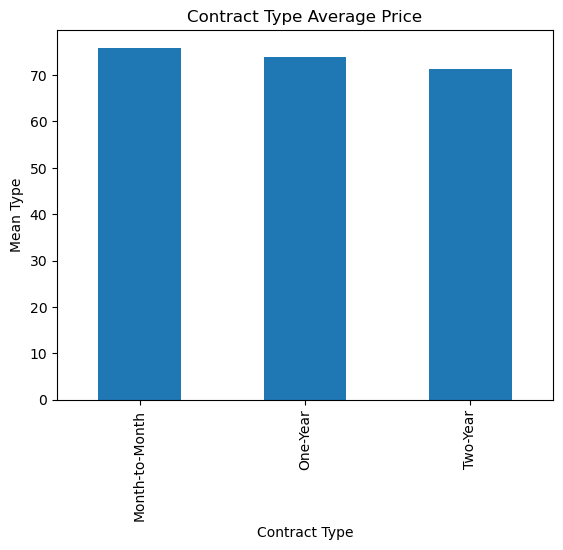

In [299]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind = "bar")
plt.ylabel("Mean Type")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

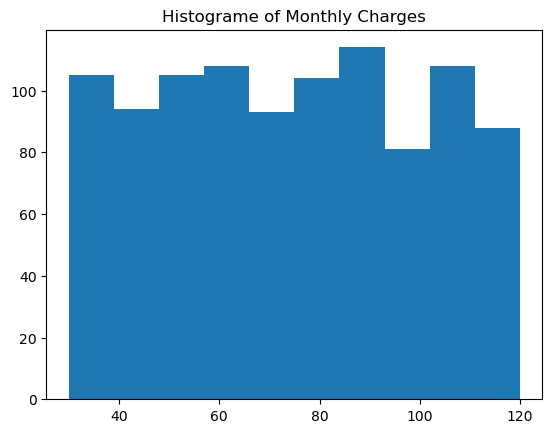

In [300]:
plt.hist(df["MonthlyCharges"])
plt.title("Histograme of Monthly Charges")
plt.show()

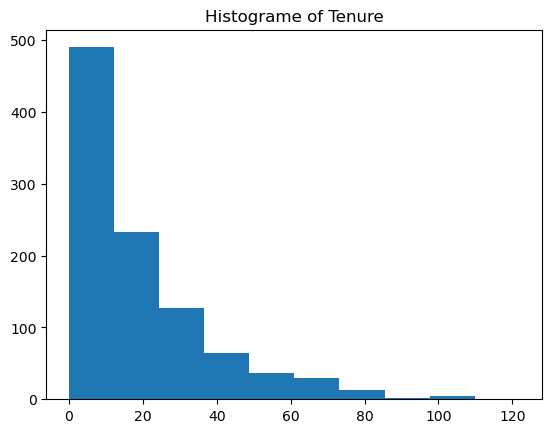

In [301]:
plt.hist(df["Tenure"])
plt.title("Histograme of Tenure")
plt.show()

In [302]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [303]:
y = df[["Churn"]]
x = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [304]:
x  
# 1 fo female 
# 0 for male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [305]:
x["Gender"] = x["Gender"].apply(lambda x : 1 if x =="Female" else 0)

In [306]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [307]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [308]:
type(x["Gender"][0])

numpy.int64

In [309]:
y["Churn"] = y["Churn"].apply(lambda x : 1 if x =="Yes" else 0)

In [310]:
type(y["Churn"][0])

numpy.int64

In [311]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
scaler = StandardScaler()

In [314]:
x_train = scaler.fit_transform(x_train)

In [315]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [316]:
x_test = scaler.fit_transform(x_test)

In [317]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
     print("Accuracy score on model is {}".format(accuracy_score(y_test, prediction)))

In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
from sklearn.linear_model import LogisticRegression

In [320]:
log_model = LogisticRegression()

In [321]:
import warnings
warnings.filterwarnings("ignore")

In [322]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [323]:
log_model.predict([[40,0,20,80]])[0]

1

In [324]:
y_pred = log_model.predict(x_test)

In [325]:
modelperformance(y_pred)

Accuracy score on model is 0.87


In [326]:
from sklearn.neighbors import KNeighborsClassifier

In [327]:
param_grid ={
    "n_neighbors" : [3,5,7,9],
    "weights": ["uniform" ,"distance"],
}

In [328]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5)  

In [330]:
gridkn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [331]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [333]:
y_pred =gridkn.predict(x_test)

In [335]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [337]:
from sklearn.svm import SVC

In [338]:
svm = SVC()

In [344]:
param_grid = {
    "C" : [0.01, 0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}

In [345]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [346]:
gridsvc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [347]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [349]:
y_pred = gridsvc.predict(x_test)

In [350]:
modelperformance(y_pred)

Accuracy score on model is 0.875


In [351]:
from sklearn.tree import DecisionTreeClassifier

In [358]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [359]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [360]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [361]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [362]:
y_pred = grid_tree.predict(x_test)

In [363]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1], dtype=int64)

In [364]:
modelperformance(y_pred)

Accuracy score on model is 0.825


In [365]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [366]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [367]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5)

In [368]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [370]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [371]:
y_pred = grid_rfc.predict(x_test)

In [372]:
modelperformance(y_pred)

Accuracy score on model is 0.875


In [376]:
best_model = gridsvc.best_estimator_

In [377]:
joblib.dump(best_model, "model.pkl")

['model.pkl']